1. Qual a frequência dos valores da variável X de maneira global? E quando correlacionada à classe A? Podemos atribuir essa frequência a uma distribuição conhecida (normal, linear, uniforme, etc)?
2. Qual a correlação entre as variáveis X e Y? É linear crescente, descrescente? Não existe relação?
3. Quantas são as ocorrências de valores faltantes entre os dados? Em quais classes essas ocorrências são mais expressivas e menos expressivas?
4. Qual a dispersão das variável X? Essa variação muda se observarmos X apenas em função da classe A?
5. Quais variáveis mudam mais quando se muda a classe observada? Quais variáveis não?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

In [17]:
df = pd.read_csv('data.csv', index_col=0)
df

,cloud,individuo,radius_10_si,radius_10_cg,radius_11_si,radius_11_cf,radius_12_si,radius_12_cg,radius_13_si,radius_13_cg,...,k_150_si,k_150_cg,k_200_si,k_200_cg,k_250_si,k_250_cg,k_300_si,k_300_cg,type,expression
0,bs000_CR_RD_0.pcd,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CR,RD
1,bs000_PR_SD_0.pcd,0,-0.649802,0.002419,-0.642394,0.002175,-0.640623,0.002034,-0.638448,0.001796,...,-0.768947,0.006286,-0.715874,0.004485,-0.689118,0.003767,-0.668550,0.003307,PR,SD
2,bs000_LFAU_15_0.pcd,0,-0.874963,0.003855,-0.864182,0.003557,-0.848145,0.003285,-0.832725,0.002924,...,-0.821884,0.006602,-0.850695,0.006289,-0.882629,0.005905,-0.897227,0.005460,LFAU,15
3,bs000_O_GLASSES_0.pcd,0,-0.836453,0.005631,-0.829042,0.004838,-0.813432,0.004051,-0.774520,0.003284,...,-0.928108,0.004075,-0.898174,0.004566,-0.876780,0.005194,-0.859757,0.005701,O,GLASSES
4,bs000_UFAU_44_0.pcd,0,-0.742564,0.002975,-0.732708,0.002898,-0.723416,0.002712,-0.709675,0.002410,...,-0.777874,0.001795,-0.759829,0.002204,-0.751591,0.002476,-0.753663,0.002734,UFAU,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,104,-0.764530,0.001931,-0.789080,0.002069,-0.814963,0.002107,-0.839514,0.002097,...,-0.747124,0.000863,-0.717919,0.001067,-0.726380,0.001271,-0.718352,0.001418,LFAU,34
4662,bs104_YR_R45_0.pcd,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YR,R45
4663,bs104_LFAU_12R_0.pcd,104,-0.848378,0.001951,-0.876071,0.002128,-0.900239,0.002265,-0.918507,0.002348,...,-0.826769,0.001078,-0.786346,0.001061,-0.793458,0.001157,-0.786525,0.001272,LFAU,12R
4664,bs104_PR_U_0.pcd,104,-0.716534,0.001659,-0.741720,0.001783,-0.777111,0.001869,-0.814343,0.001841,...,-0.617309,0.000390,-0.641318,0.000686,-0.665903,0.000980,-0.678577,0.001171,PR,U


Essa nuvem quando colocado os valores de curvatura gaussiana = 0.005 e shape index = -0.85, o algoritmo encontra o canto interno direito do olho. O que ela tem de especial??

Como mostrado em uma análise mais abaixo: ela pertence a um conjunto de nuvens onde o shape index se concentra entre -0.9 e -0.8. E a curvatura com valores bem próximos de 0.005.

In [3]:
df.iloc[40]

cloud           bs000_E_ANGER_0.pcd
individuo                         0
radius_10_si               -0.85091
radius_10_cg               0.004594
radius_11_si              -0.859452
radius_11_cf               0.004508
radius_12_si              -0.867032
radius_12_cg               0.004385
radius_13_si              -0.857345
radius_13_cg               0.004091
radius_14_si              -0.829545
radius_14_cg               0.003642
k_100_si                  -0.737684
k_100_cg                   0.003005
k_150_si                  -0.780207
k_150_cg                   0.003748
k_200_si                   -0.80677
k_200_cg                   0.004364
k_250_si                  -0.819825
k_250_cg                   0.004552
k_300_si                  -0.823293
k_300_cg                   0.004544
type                              E
expression                    ANGER
Name: 40, dtype: object

In [4]:
columns = df.columns[2:-2].values # only shape index and gaussian curvature column values

## Correlation Matrix

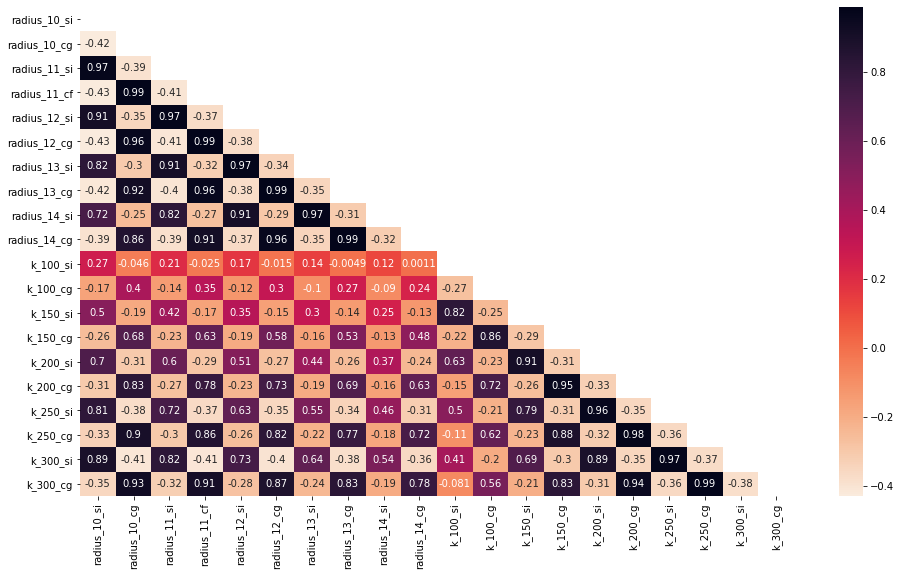

In [5]:
corr = df[columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.cm.rocket_r)
plt.show()

In [6]:
# plot_histograms is a function that plot subplots of histograms based on expression. If expression
# is None, the complete dataframe will be used.
def plot_histograms(df, expression=None):
    nrows, ncols = 4, 5 
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, column in enumerate(columns):
        df.hist(ax=axes[i, j], column=[column], bins=10) # What is the better bins to use? 10 is default.
        j += 1
        if j == 5:
            i += 1
            j = 0

    plt.show()

## Global Frequency

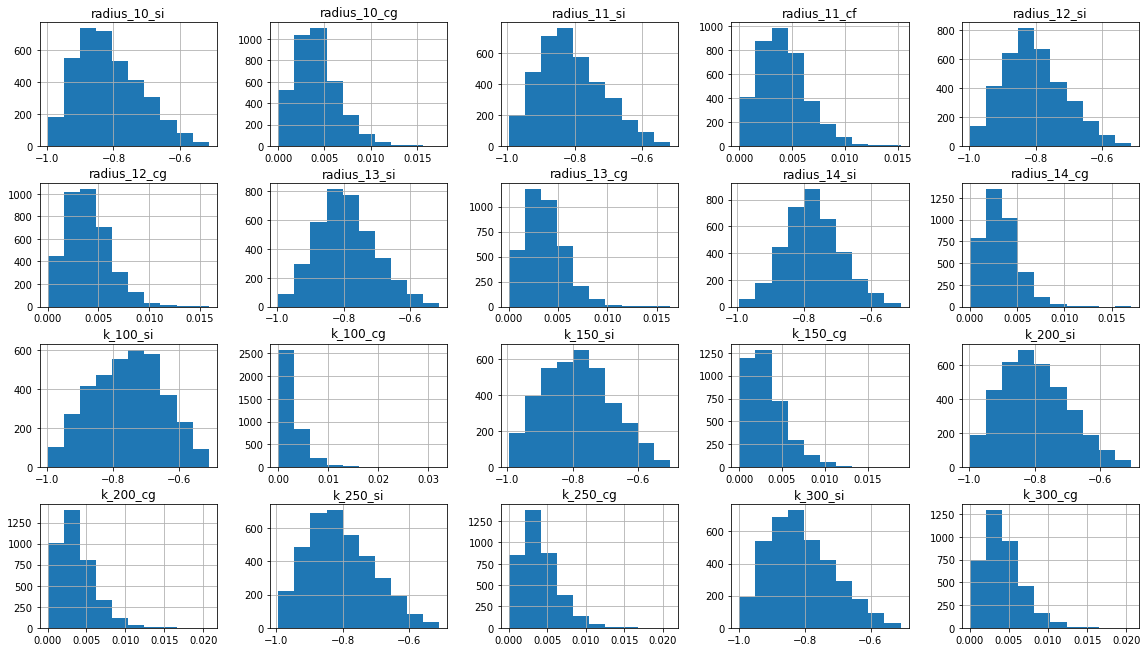

In [7]:
plot_histograms(df)

Observações:

1. Podemos perceber que na maioria dos gráficos o shape index pode variar entre -1 e -0.5, enquanto que a curvatura pode variar entre 0.000 e 0.005 (valores muito pequenos).
2. Com essa informação, eu brinquei um pouco na ferramenta 3D e obtive uma experiência bem legal. Quando coloco esses valores, antes de ele encontrar a ponta do nariz, ele passa por regiões perto dos olhos. Vou deixar dois prints abaixo mostrando os resultados.

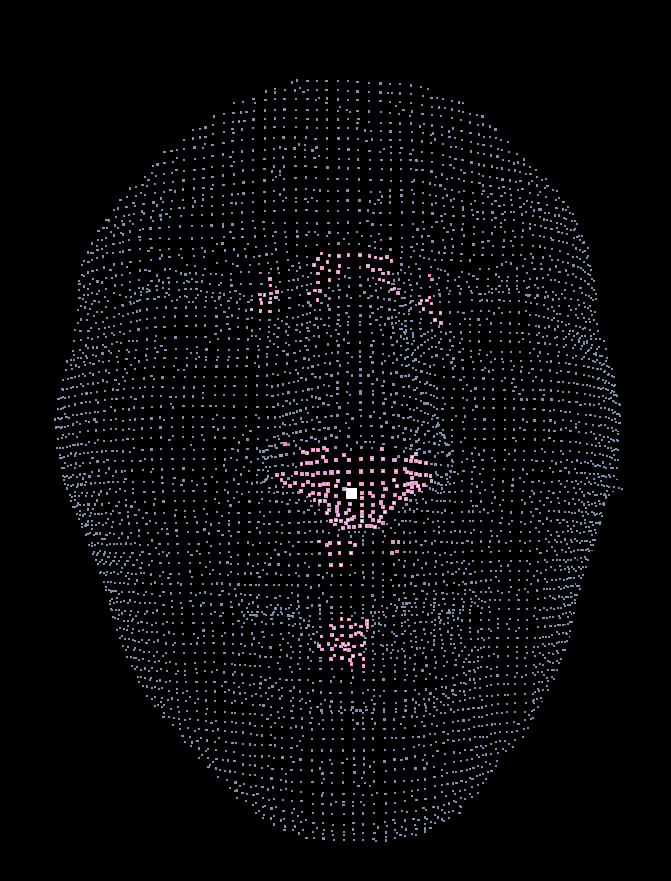

Enquanto que em outra nuvem: bs000_E_ANGER_0.pcd ele já encontra o canto do olho direito. :D

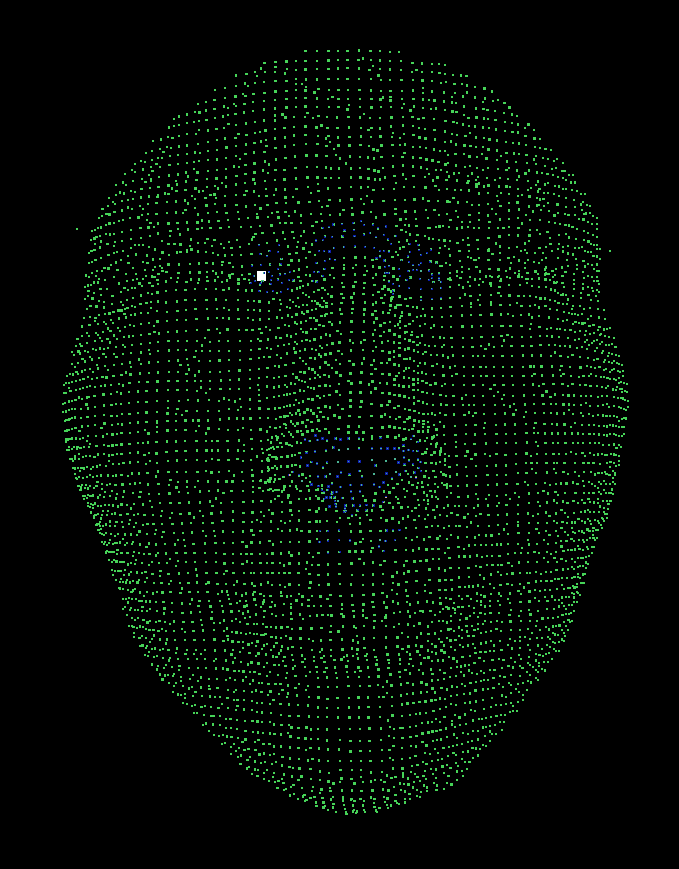

Ps: Essa nuvem está pré-processada. Quando testado na nuvem original o resultado é esse:

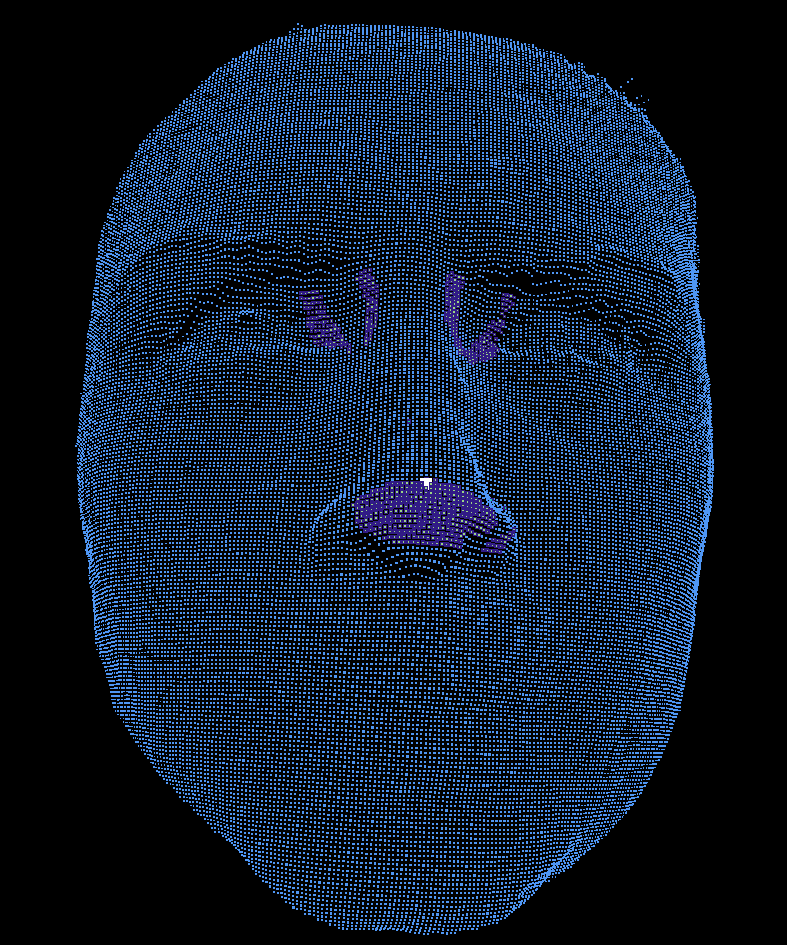

Ok, isso é ótimo!!

Como o algoritmo é para encontrar a ponta do nariz, ele vai um pouco mais além com a filtragem, mas em um algum momento ele passa por essa região. Precisamos descobrir que região é essa.

Estou tendo um pouco de dificuldades para encontrar essa região porque ainda estou tentando entender melhor a implementação do algoritmo.

Obs: O algoritmo de encontrar a ponta do nariz é ótimo, até porque mesmo mudando os parâmetros de entrada, ele ainda encontra. Mas com a brilhante mente do desenvolvedor que fez, a gente tem um log dessas nuvens e, portanto, conseguimos ver por onde ele passou. E manualmente rodando esse algoritmo com várias nuven diferentes, é fato que o algoritmo, na maioria das vezes, sempre passa pelra região dos olhos.

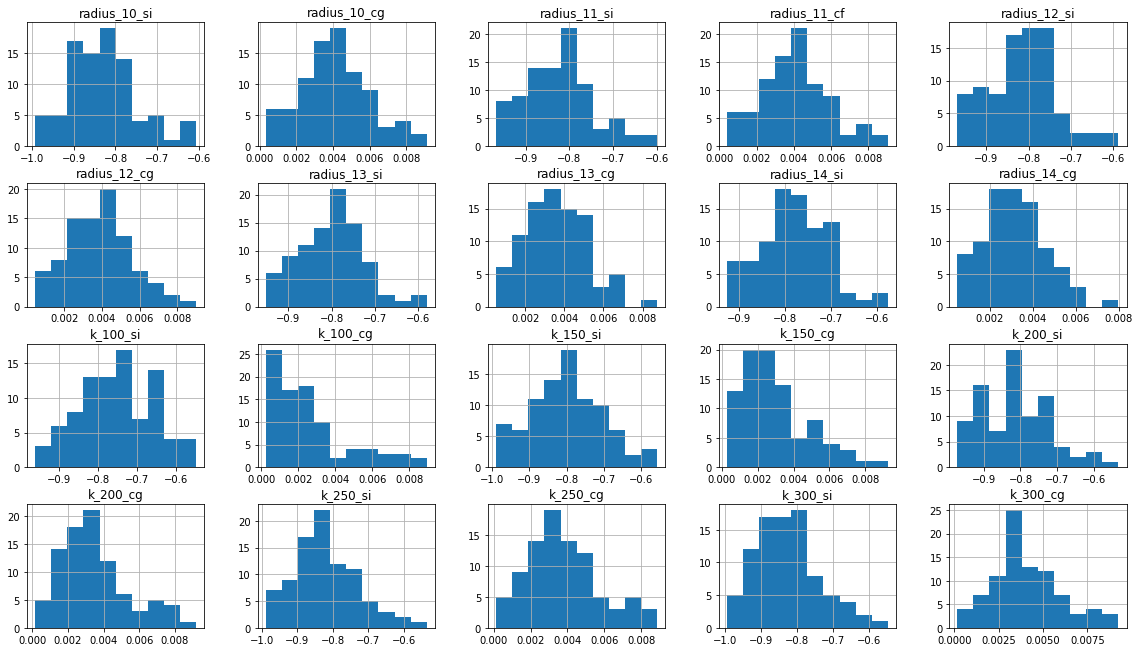

In [8]:
plot_histograms(df, expression='A22A25')

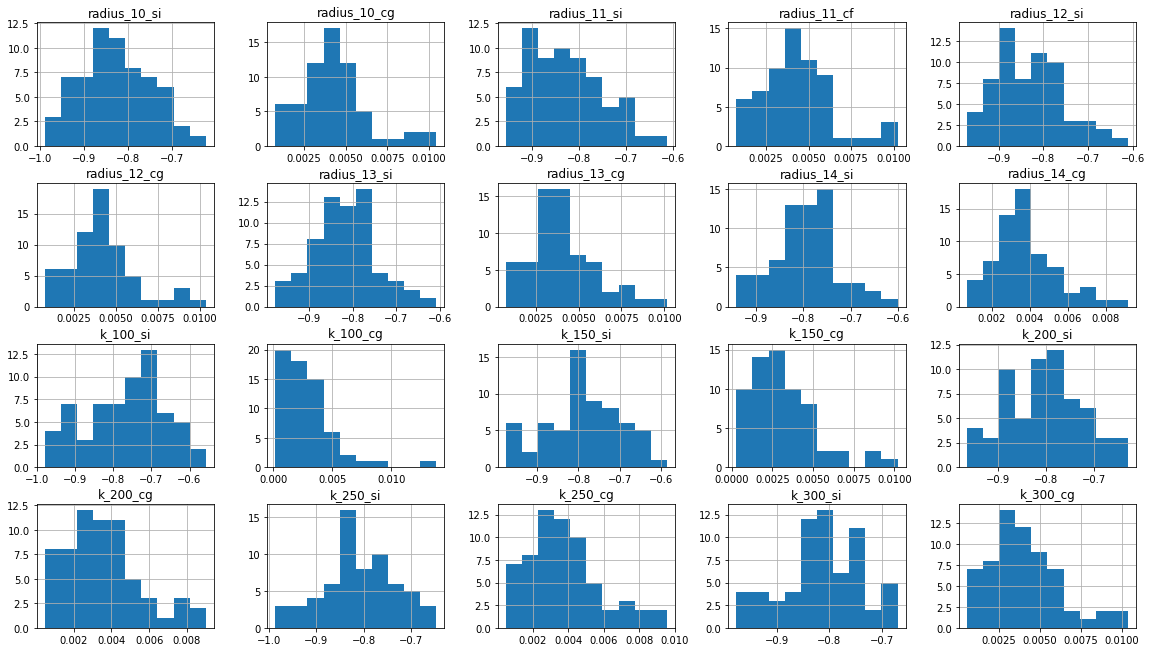

In [9]:
plot_histograms(df, expression='ANGER')

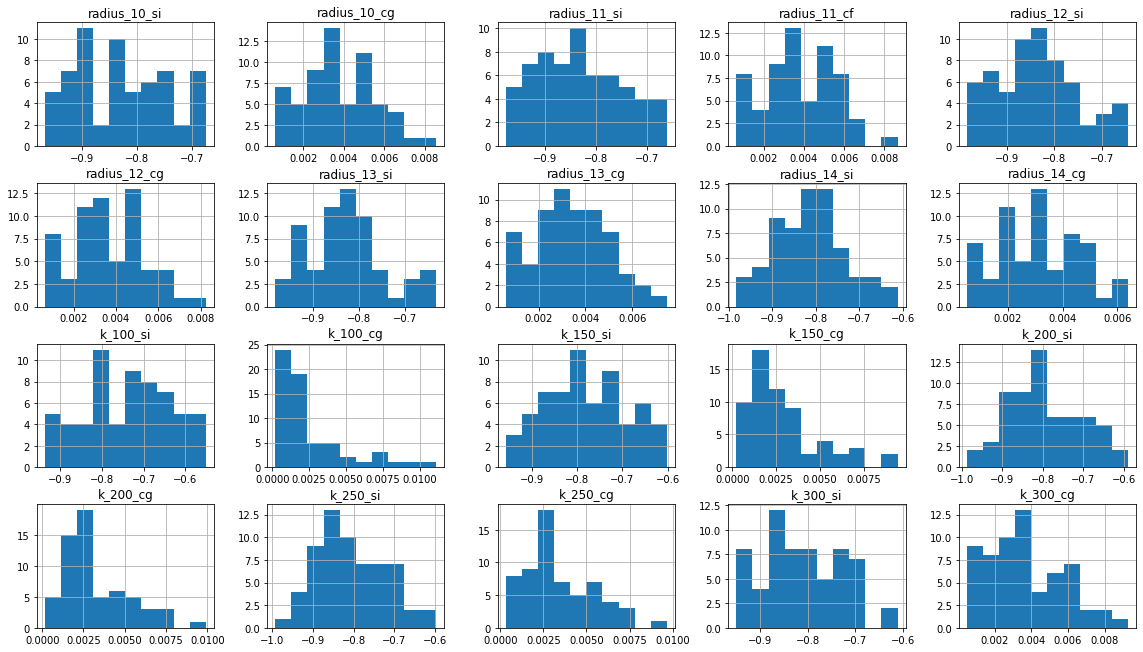

In [10]:
plot_histograms(df, expression='FEAR')

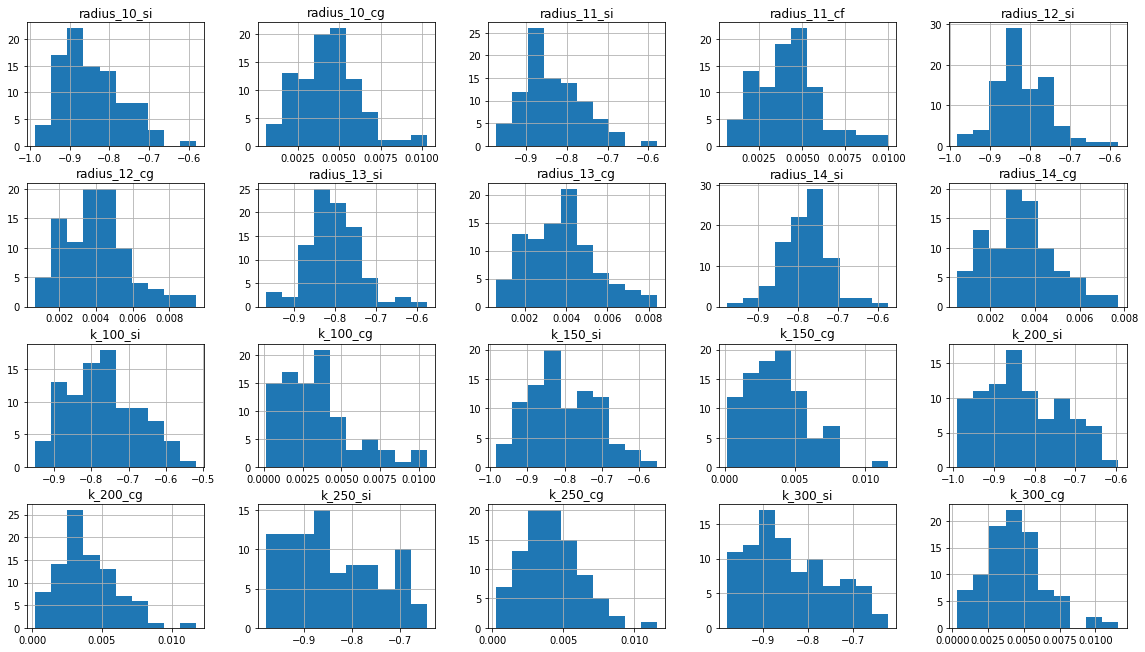

In [11]:
plot_histograms(df, expression='HAPPY')

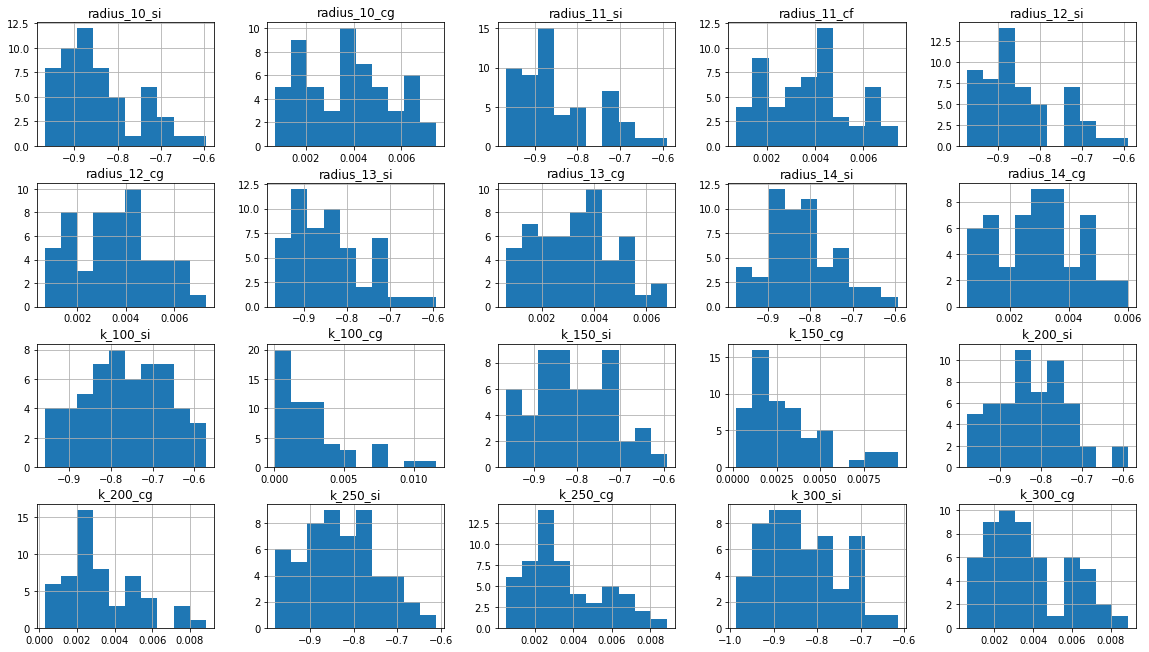

In [12]:
plot_histograms(df, expression='SURPRISE')

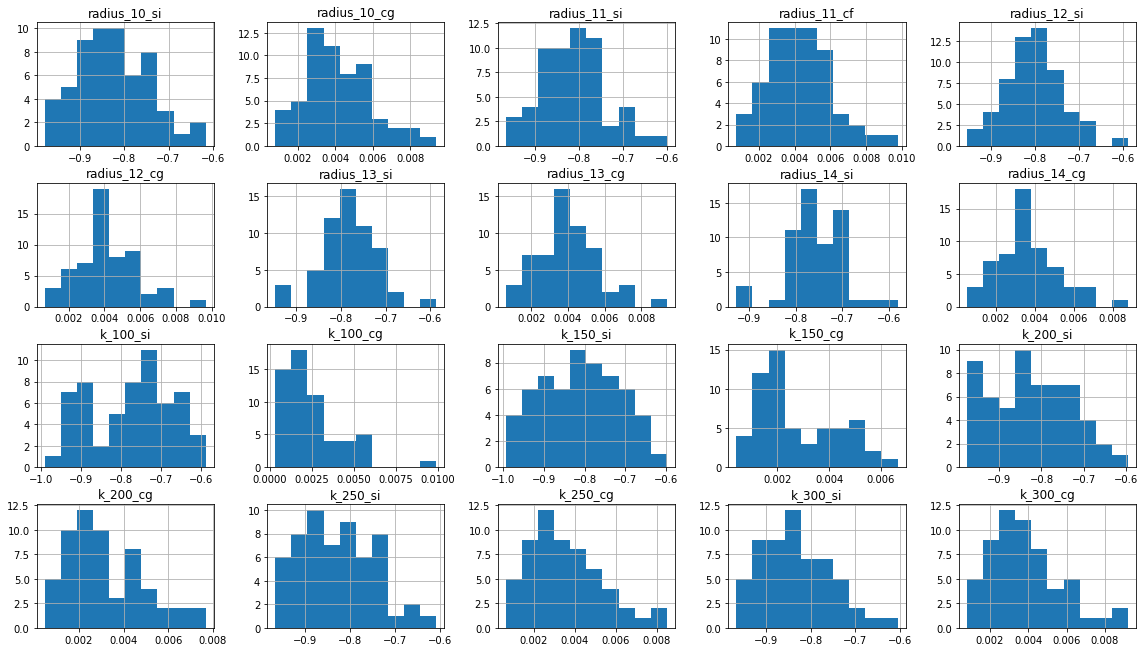

In [13]:
plot_histograms(df, expression='SADNESS')

Baseado em algumas análises dos histogramas, temos algumas informações:

- Valores de shape index e curvatura gaussiana com raio=13 ótimos para expressões ANGER e DISGUST.
  - Shape Index: -0.78
  - Curvatura Gaussiana: 0.0038
  
  Quando eu digo que esses valores são ótimos, é porque durante o processamento do algoritmo, uma grande região de pontos é formada em volta do canto do olho direito e esquerdo.
  
- Como eu ainda estou utilizando o algoritmo do Marcus como base, ele tá levando em consideração algumas métricas/estratégias relacionadas a ponta do nariz. Por exemplo: depois que ele faz a filtragem do crop, ele remove os pontos isolados utilizando a seguinda estratégia:
  - Para cada ponto, dado um raio da ponta do nariz e um numero de threshold como input, ele pega o número de n vizinhos dentro desse raio. E no final, o nosetip é escolhido escolhendo aquele ponto com o maior número de vizinhos. Mas ele só leva em consideração o maior número de pontos, se for igual, ele não substitui o nosetip escolhido. Coloando essa pequena modificação no algoritmo (>=), ele começa a escolher outros pontos aleatorios (mas coincidentemente alguns dos pontos foram: canto interno do olho esquerdo, canto esquerdo e direito da boca).
    
    Existe uma outra estratégia para isso?
    
    - Comecei a análisar os valores de anisotropia, será que eles nos dizem algo?

TODO:

[ ] Refrescar mais um pouco na memória o TCC do Marcus.

[ ] Refrescar mais um pouco o artigo que eu estava lendo anteriormente.

### Plot only one histogram for better visualization

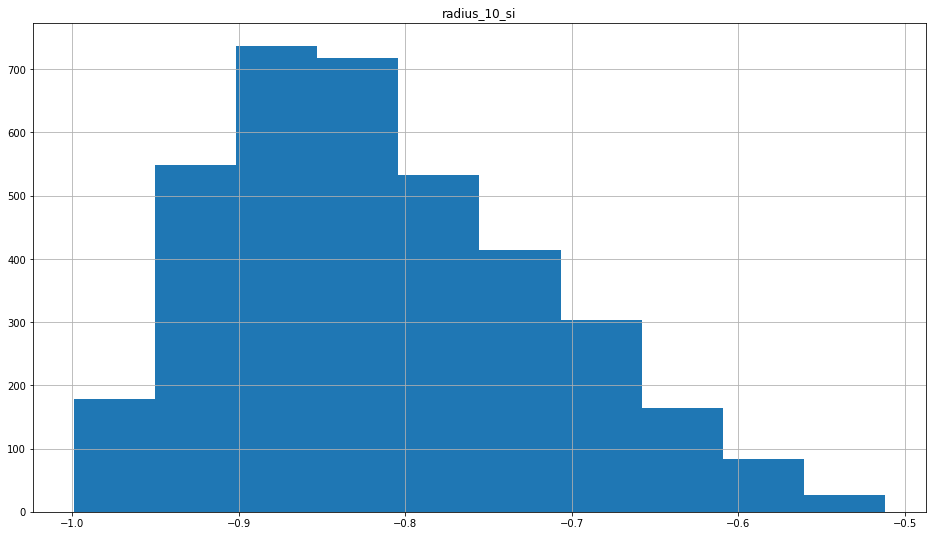

In [14]:
column = 'radius_10_si'
hist = df.hist(column=column, bins=10)
plt.show()

## Null values

Number of null values in the dataset. If there is a null value in one column, all other columns will also have null values. So this operation below shows how many null rows we have.

In [15]:
df['radius_10_si'].isna().sum()

958

But how many null lines are there for each class?

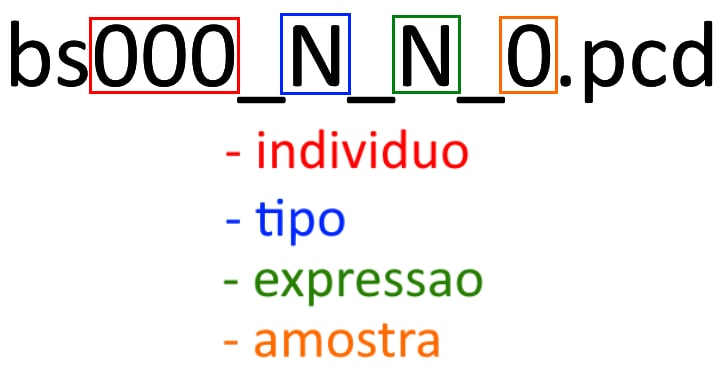

http://bosphorus.ee.boun.edu.tr/Content.aspx

In [16]:
HAPPY# TODO: Are these expressions right? I'll check the bosphorus documentation.

expressions = df['expression'].unique()

for expression in expressions:
    total = df['radius_10_si'].loc[df['expression'] == expression].isna().sum()
    print(f'Expression:HAPPY {expression} - {total}')

NameError: name 'HAPPY' is not defined

## Variances

In [ ]:
variances = df[columns].var()
variances

Largest variance:

In [ ]:
variances.idxmax()

Lowest variância:

In [ ]:
variances.idxmin()

In [ ]:
plt.plot(range(len(variances)), variances.values)
plt.xlabel('X')
plt.ylabel('Variances')
plt.show()

## Means

In [ ]:
means = df[columns].mean()
means

Largest mean:

In [ ]:
means.idxmax()

Lowest mean:

In [ ]:
means.idxmin()

In [ ]:
plt.plot(range(len(means)), means.values)
plt.xlabel('X')
plt.ylabel('Means')
plt.show()

In [20]:
def plot_scatterplot(df, column, expression=None):
    nrows, ncols = 4, 5 
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, col in enumerate(columns):
        df.plot.scatter(ax=axes[i, j], x=column, y=col)
        j += 1
        if j == 5:
            i += 1
            j = 0

    plt.show()

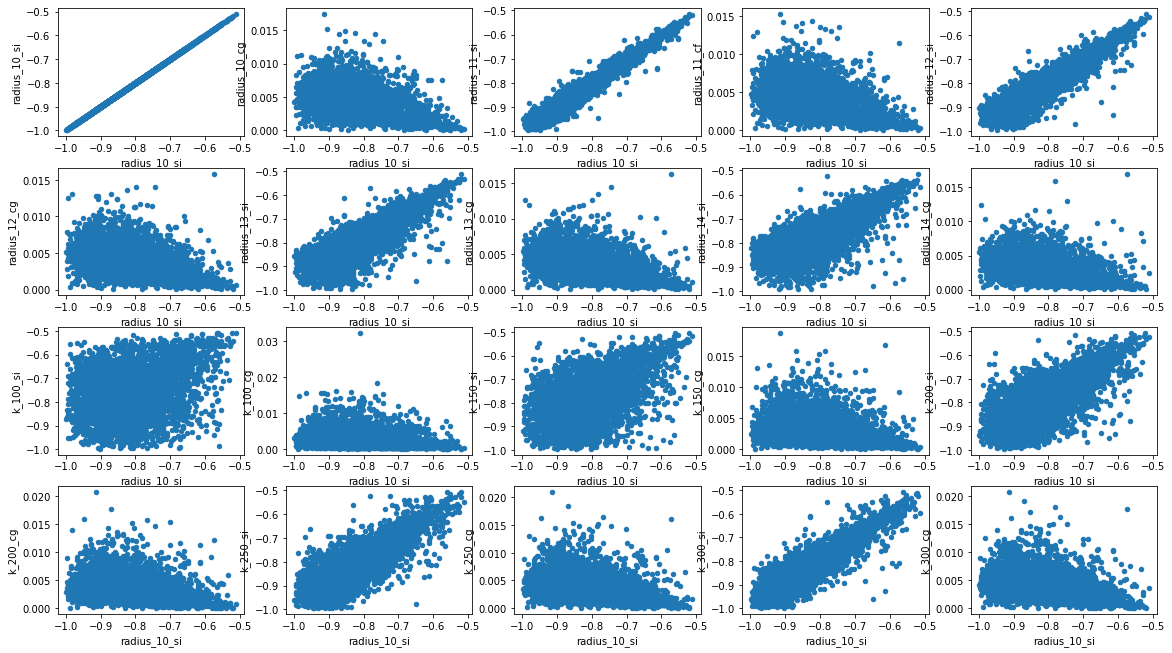

In [21]:
plot_scatterplot(df, 'radius_10_si')

In [ ]:
plot_scatterplot(df, 'radius_11_si')

In [ ]:
plot_scatterplot(df, 'radius_10_cg')

In [ ]:
def plot_boxplots(df):
    nrows, ncols = 4, 5 
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()

    i, j = 0, 0 # refactor
    for index, col in enumerate(columns):
        df.boxplot(column=col, ax=axes[i, j])
        j += 1
        if j == 5:
            i += 1
            j = 0

    plt.show()

def plot_boxplot(df, column):
    df.boxplot(column=column)
    plt.show()

In [ ]:
plot_boxplots(df)

In [ ]:
plot_boxplot(df, 'radius_10_si')

In [ ]:
plot_boxplot(df, 'radius_10_cg')